In [1]:
# import libraries
library(ggplot2)
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots

In [2]:
# adding the file path probability file
proba_path <- file.path("../../../results/3.jump_analysis/JUMP_injury_proba.csv.gz")

# loading in probability file path
proba_df <- read.table(proba_path, head = TRUE, sep=",")

# replacing True and False to shuffled to non shuffled
proba_df$shuffled_model <- ifelse(proba_df$shuffled_model == "False", "Not Shuffled",
                                      ifelse(proba_df$shuffled_model == "True", "Shuffled", proba_df$shuffled_model))
# displaying
print(dim(proba_df))
head(proba_df)

[1] 584940      5


,Metadata_InChIKey,shuffled_model,pred_injury,injury_type,proba
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,,Not Shuffled,Ferroptosis,Control,1.438464e-17
2,,Not Shuffled,Mitochondria,Control,1.715604e-12
3,,Not Shuffled,Mitochondria,Control,1.297985e-09
4,,Not Shuffled,Mitochondria,Control,8.163913e-14
5,,Not Shuffled,Mitochondria,Control,8.853317e-08
6,,Not Shuffled,Mitochondria,Control,1.646288e-10


In [3]:
# showing the unique injuries
unique(proba_df$injury_type)

[1] "Control"              "Cytoskeletal"         "Hsp90"               
 [4] "Kinase"               "Genotoxin"            "Miscellaneous"       
 [7] "Redox"                "HDAC"                 "mTOR"                
[10] "Proteasome"           "Saponin"              "Mitochondria"        
[13] "Ferroptosis"          "Tannin"               "Nonspecific reactive"

Warning message in brewer.pal(2, "Dark2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


Picking joint bandwidth of 0.0047

Picking joint bandwidth of 0.00444

Picking joint bandwidth of 0.00391

Picking joint bandwidth of 0.00607

Picking joint bandwidth of 0.00668

Picking joint bandwidth of 0.00447

Picking joint bandwidth of 0.00548

Picking joint bandwidth of 0.00736

Picking joint bandwidth of 0.00674

Picking joint bandwidth of 0.00553

Picking joint bandwidth of 0.0084

Picking joint bandwidth of 0.00544

Picking joint bandwidth of 0.0074

Picking joint bandwidth of 0.00659

Picking joint bandwidth of 0.00595

Picking joint bandwidth of 0.0047

Picking joint bandwidth of 0.00444

Picking joint bandwidth of 0.00391

Picking joint bandwidth of 0.00607

Picking joint bandwidth of 0.00668

Picking joint bandwidth of 0.00447

Picking joint bandwidth of 0.00548

Picking joint bandwidth of 0.00736

Picking joint bandwidth of 0.00674

Picking joint bandwidth of 0.00553

Picking joint bandwidth of 0.0084

Picking joint bandwidth of 0.00544

Picking joint bandwidth of 0.0074

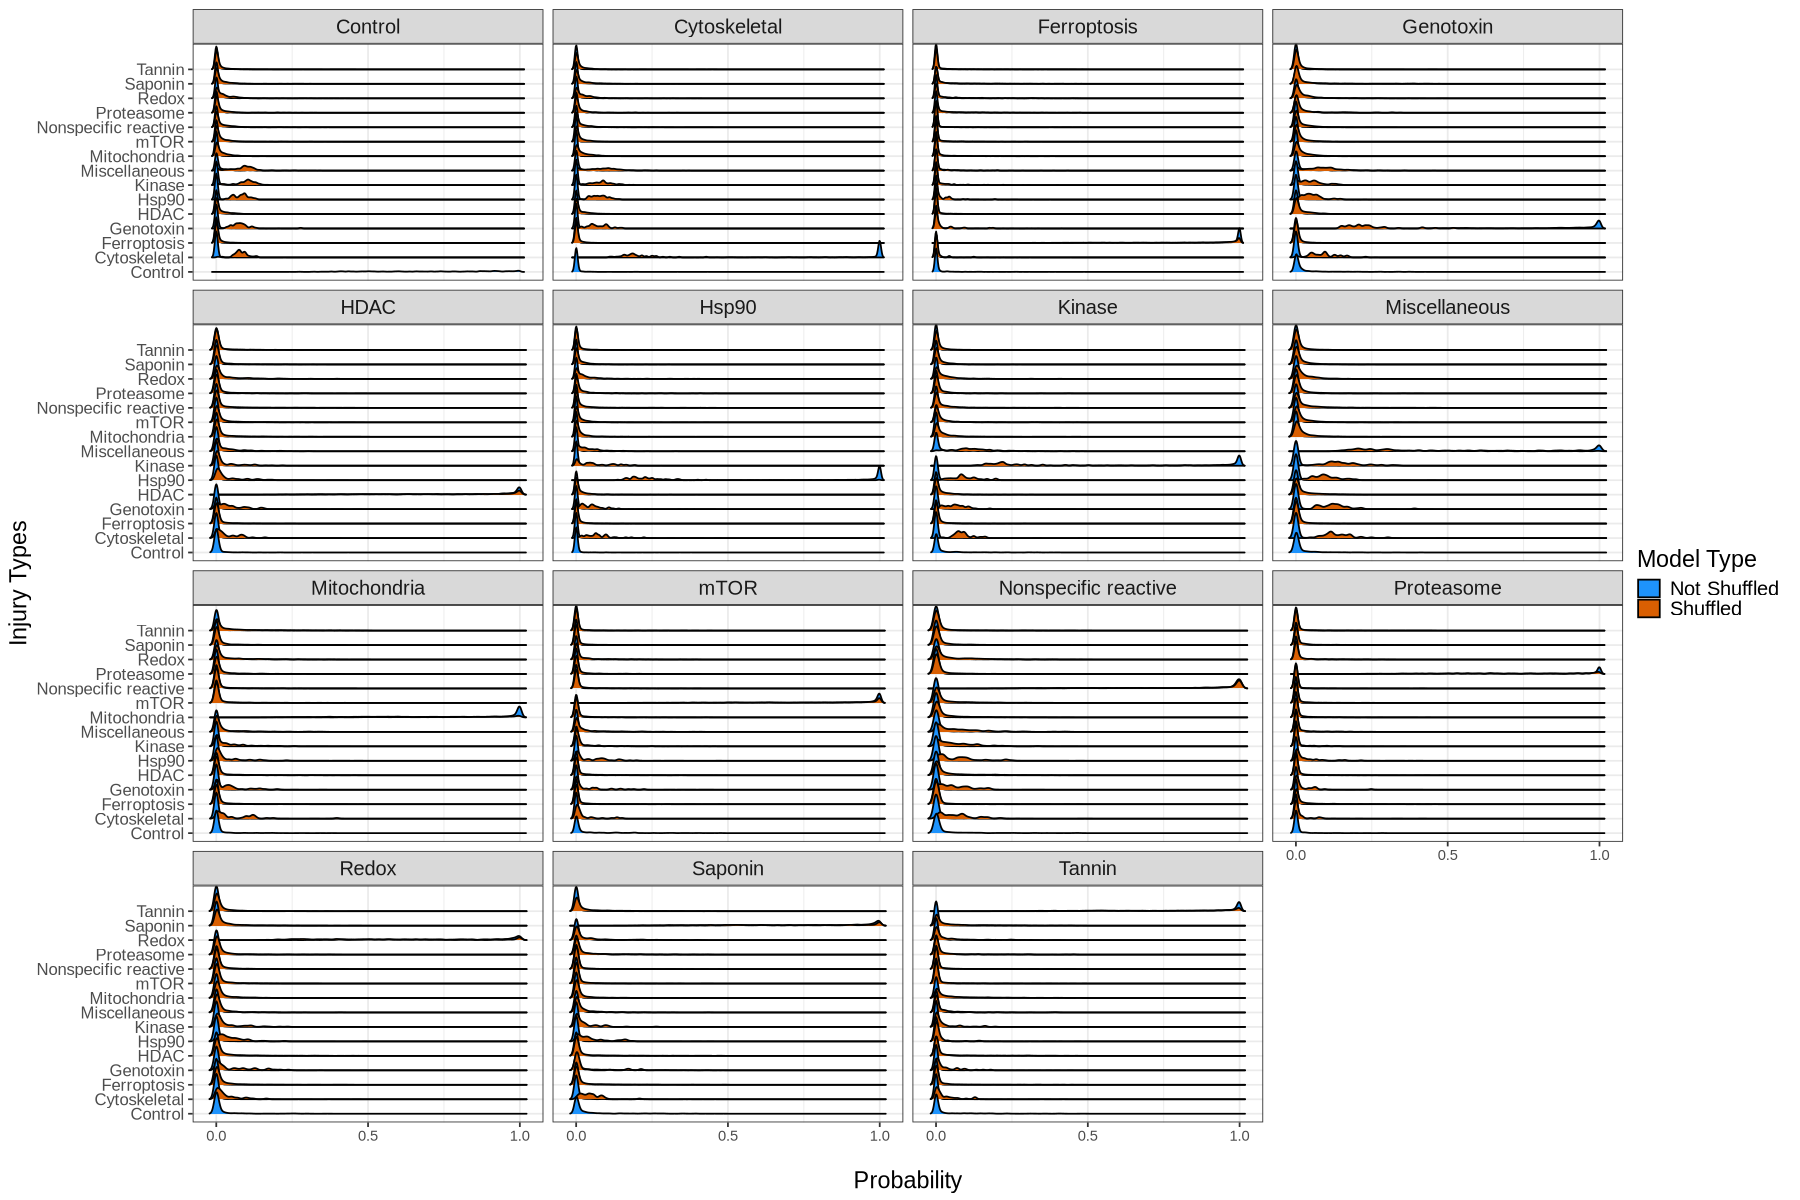

In [4]:
# image size
img_height <- 10
img_width <- 15

options(repr.plot.width = img_width, repr.plot.height = img_height)
ridge_plot <- (
    ggplot(proba_df, aes(x = proba, y = pred_injury, fill = shuffled_model)) +
    geom_density_ridges() +
    facet_wrap(~injury_type) +
    scale_x_continuous(breaks = seq(0, 1, 0.5)) +
    theme_bw() +

    # no legend
    theme(plot.title = element_text(size = 20, hjust = 0.5)) +

    scale_fill_manual(values = c(
    "Shuffled" = brewer.pal(2, "Dark2")[2],
    "Not Shuffled" = "#1E93FC"
    )) +

    theme(
        axis.title.x = element_blank(),
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        strip.text = element_text(size = 12),
        axis.text.y = element_text(size = 10),
        axis.title = element_text(size = 14),
        axis.title.x.bottom = element_text(margin = margin(t = 15)),
        axis.title.y.left = element_text(margin = margin(t = 15)),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
        )) +

    labs(y = "Injury Types", x = "Probability", fill = "Model Type")

ridge_plot

ggsave(filename = "JUMP_cell_injury_facet_proba.png", height = img_height, width = img_width, dpi=600)
